# Auto ARIMA para séries do TCC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, ARIMA

c:\Users\matno\anaconda3\envs\quant\lib\site-packages\statsforecast\core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
current_path = os.getcwd()

In [4]:
path_series = current_path+"\\Dados\\Tratados\\"

ena = pd.read_csv(path_series+"ena_limpo.csv")
vazao = pd.read_csv(path_series+"vazao_limpo.csv")
carga = pd.read_csv(path_series+"carga_limpo.csv")

dict_series = dict()
dict_series["ena"] = dict()
dict_series["vazao"] = dict()
dict_series["carga"] = dict()

dict_series["ena"]["values"] = ena.ENA
dict_series["ena"]["dates"] = ena.Data
dict_series["carga"]["values"] = carga.Carga
dict_series["carga"]["dates"] = carga.Data
dict_series["vazao"]["values"] = vazao.Vazao
dict_series["vazao"]["dates"] = vazao.Data

In [19]:
# series = ["carga", "ena", "vazao"]

# for serie in series:
#     print(serie)
#     y = dict_series[serie]["values"]
#     datas = dict_series[serie]["dates"]

#     horizon = 12

#     y_train = y.iloc[0:-horizon]
#     y_test = y.iloc[-horizon:]

#     data_train = datas.iloc[0:-horizon]
#     data_test = datas.iloc[-horizon:]

#     # model = AutoARIMA(start_P=1,start_Q=1,start_p=1,start_q=1)

#     # fitted_model = model.fit(y_train.values)
#     print("SARIMA (%d,%d,%d)x(%d,%d,%d,%d)"%(fitted_model.model_["arma"][0],fitted_model.model_["arma"][5],fitted_model.model_["arma"][1],
#                                         fitted_model.model_["arma"][2],fitted_model.model_["arma"][6],fitted_model.model_["arma"][3],fitted_model.model_["arma"][4]))

#     sarima = ARIMA(order = (fitted_model.model_["arma"][0],fitted_model.model_["arma"][5],fitted_model.model_["arma"][1]),
#                     seasonal_order = (3,fitted_model.model_["arma"][6],1))
#     fitted_model = sarima.fit(y_train.values)

#     fit_in_sample = fitted_model.predict_in_sample()["fitted"]
#     fit_in_sample = pd.DataFrame(dict(Data=data_train, Values=fit_in_sample))

#     y_hat = fitted_model.predict(h=horizon)["mean"]
#     y_hat = pd.DataFrame(dict(Data=data_test, Values=y_hat))

#     fit_in_sample.to_csv(path_series+serie+"_fit_autoarima.csv")
#     y_hat.to_csv(path_series+serie+"_forecast_autoarima.csv")

carga
SARIMA (0,1,3)x(0,0,0,1)
ena
SARIMA (1,0,2)x(0,0,0,1)
vazao
SARIMA (0,1,3)x(0,0,0,1)


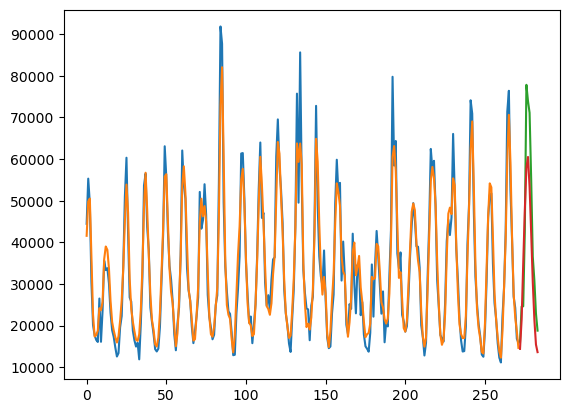

In [16]:
serie = "ena"
y = dict_series[serie]["values"]
datas = dict_series[serie]["dates"]

horizon = 12

y_train = y.iloc[0:-horizon]
y_test = y.iloc[-horizon:]

data_train = datas.iloc[0:-horizon]
data_test = datas.iloc[-horizon:]


sarima = ARIMA(order = (13,0,2),
                seasonal_order = (0,0,0))
fitted_model = sarima.fit(y_train.values)

fit_in_sample = fitted_model.predict_in_sample()["fitted"]
fit_in_sample = pd.DataFrame(dict(Data=data_train, Values=fit_in_sample))

y_hat = fitted_model.predict(h=horizon)["mean"]
y_hat = pd.DataFrame(dict(Data=data_test, Values=y_hat))

fit_in_sample.to_csv(path_series+serie+"_fit_autoarima.csv")
y_hat.to_csv(path_series+serie+"_forecast_autoarima.csv")

plt.plot(y_train)
plt.plot(fit_in_sample.Values)
plt.plot(y_test)
plt.plot(y_hat.Values)

In [ ]:
def correct_scale(series, K, residuals):
    sqr = np.sum(residuals**2)
    N = len(residuals)
    sigma2 = sqr/(N-K)
    return np.exp(series)*np.exp(0.5*sigma2)


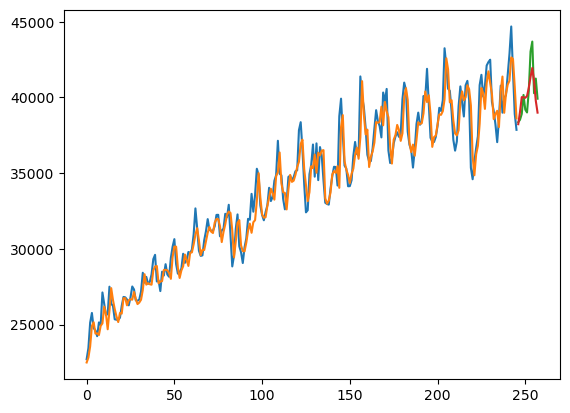

In [59]:
serie = "carga"
y = np.log(dict_series[serie]["values"])
datas = dict_series[serie]["dates"]

horizon = 12

y_train = y.iloc[0:-horizon]
y_test = y.iloc[-horizon:]

data_train = datas.iloc[0:-horizon]
data_test = datas.iloc[-horizon:]


sarima = ARIMA(order = (12,1,1),
                seasonal_order = (0,0,0))
fitted_model = sarima.fit(y_train.values)

fit_in_sample = fitted_model.predict_in_sample()["fitted"]

residuals = y_train - fit_in_sample
fit_in_sample = correct_scale(fit_in_sample, 16, residuals)

fit_in_sample = pd.DataFrame(dict(Data=data_train, Values=fit_in_sample))

y_hat = fitted_model.predict(h=horizon)["mean"]
y_hat = correct_scale(y_hat, 16, residuals)
y_hat = pd.DataFrame(dict(Data=data_test, Values=y_hat))

fit_in_sample.to_csv(path_series+serie+"_fit_autoarima.csv")
y_hat.to_csv(path_series+serie+"_forecast_autoarima.csv")

plt.plot(np.exp(y_train))
plt.plot(fit_in_sample.Values)
plt.plot(np.exp(y_test))
plt.plot(y_hat.Values)

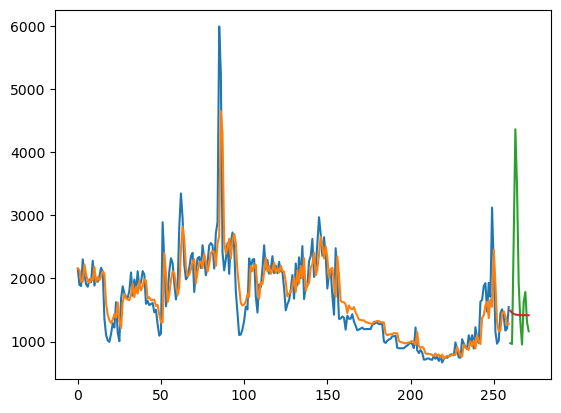

In [23]:
serie = "vazao"
y = dict_series[serie]["values"]
datas = dict_series[serie]["dates"]

horizon = 12

y_train = y.iloc[0:-horizon]
y_test = y.iloc[-horizon:]

data_train = datas.iloc[0:-horizon]
data_test = datas.iloc[-horizon:]


sarima = ARIMA(order = (1,1,1),
                seasonal_order = (0,0,0))
fitted_model = sarima.fit(y_train.values)

fit_in_sample = fitted_model.predict_in_sample()["fitted"]
fit_in_sample = pd.DataFrame(dict(Data=data_train, Values=fit_in_sample))

y_hat = fitted_model.predict(h=horizon)["mean"]
y_hat = pd.DataFrame(dict(Data=data_test, Values=y_hat))

fit_in_sample.to_csv(path_series+serie+"_fit_autoarima.csv")
y_hat.to_csv(path_series+serie+"_forecast_autoarima.csv")

plt.plot(y_train)
plt.plot(fit_in_sample.Values)
plt.plot(y_test)
plt.plot(y_hat.Values)